# **Importing Necessary Packages:**

In [ ]:
#Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Import the Data:

In [ ]:
#Accessing the data
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)




***Q.1 Why does it makes sense to discretize columns for this problem?***

It makes sense to discretize columns for this problem because we are dealing with decision trees in which our variables are categorical. By discretizing we make it easier for the models to handle the values. 

***Q.2 What might be the issues (if any) if we DID NOT discretize the columns.***
If we did not discretize the columns in the census dataset then we could encounter issues working with certain machine learning models that require categorical inputs. Also, if there are too many unique values in a continuous feature then there can be overfitting of the model.

# **2. Data Quality Analysis (DQA):**

In [ ]:
#Looking at the first 5 rows of data
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
#Taking a count of all of our variables
df.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
#Looking at how many null values we have:
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Looking into the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
#Now we look at the descriptive statistics for each column to understand dataset better. 
df.describe(include = 'all')

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842.000000
unique,5,5,3,3,3,5,5,2,5,2,NaN
top,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,NaN
freq,26639,13971,22047,42525,29737,30324,30324,46012,13963,32561,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239282
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426649
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


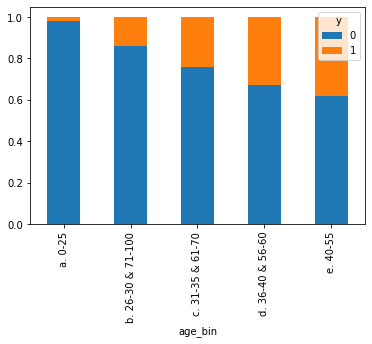

In [ ]:
#Age Graph

pd.crosstab(df['age_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

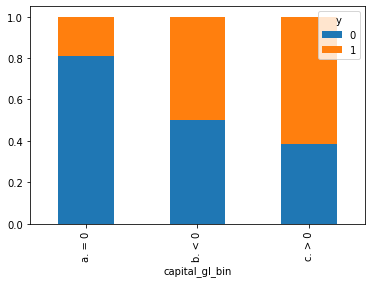

In [ ]:
#Capital Gain Graph
pd.crosstab(df['capital_gl_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

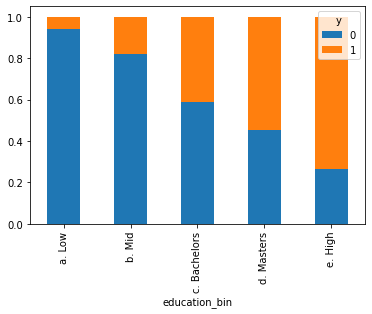

In [ ]:
#Education Graph
pd.crosstab(df['education_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

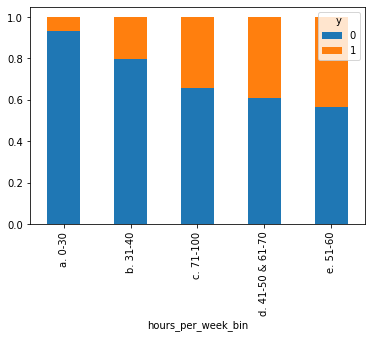

In [ ]:
#Hours Per Week Graph
pd.crosstab(df['hours_per_week_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

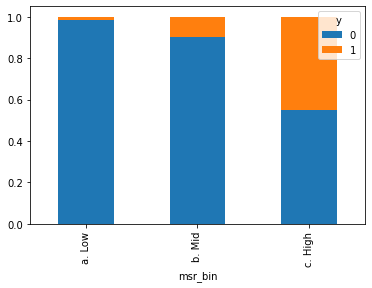

In [ ]:
#Marriage Status and Relationship Graph
pd.crosstab(df['msr_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

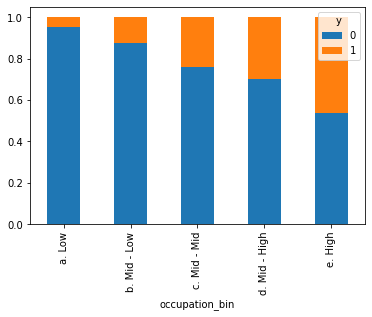

In [ ]:
#Occupation Graph
pd.crosstab(df['occupation_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

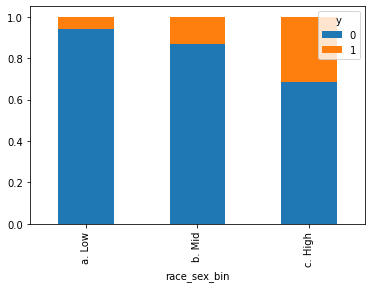

In [ ]:
#Race Sex Graph
pd.crosstab(df['race_sex_bin'],df['y'],normalize='index').plot(kind='bar',stacked=True)

# **3. Building Decision Tree Classifier Models**

In [ ]:
#Splitting the data into test and train data
split = df['flag'].unique()
print(split)

for value in split:
    train_data = df[df['flag']== 'train']
    test_data = df[df['flag']== 'test']

['train' 'test']


In [ ]:
#Taking a look at the test data
test_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0


In [ ]:
#Taking a look at the train data
train_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
#creating dummy variables for all of our bins to make our decisison tree run

x_train = pd.get_dummies(train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_data['y']

x_test=pd.get_dummies(test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_data['y']

In [ ]:
#Building our decision based tree for interpretation
dtree=DecisionTreeClassifier(max_depth=10,random_state=101, max_features=None, min_samples_leaf=15)

dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time)

0.013246066889999781


# **4. Evaluate Decision Tree Performance**

[[11521   914]
 [ 1653  2193]]


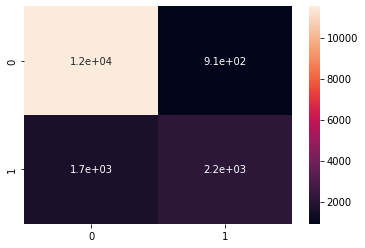

In [ ]:
#Generating a heatmap matrix 
print(metrics.confusion_matrix(y_test, y_pred))

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [ ]:
#Generating the accuracy score
print(accuracy_score(y_test, y_pred))

0.8423315521159634


In [ ]:
#Generating the Precision, Recall, & F1 Scores
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [ ]:
#Generating the AUC value
print(roc_auc_score(y_test, y_pred))

0.7483502983062628


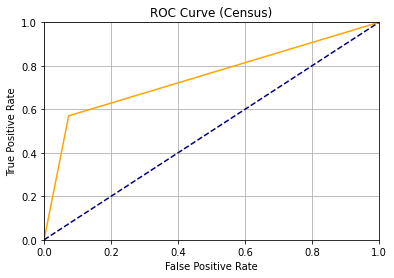

In [ ]:
#ROC Curve shows us the TPR (True Positive Rate) vs the FPR(False Positive Rate) 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Census)')
plt.grid(True)
plt.show()

# **5. Tune Decision Tree Performance**

Run 1: Choosing Criteria (Entropy or Gini Impurity)

In [ ]:
#Using a for loop to see the accuracy of criteria option model
results = []
criterion_options = ['entropy', 'gini']
for criterion in criterion_options:
    model = DecisionTreeClassifier(criterion=criterion,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(f"{criterion}: {rounded_accuracy}")
print(results)


['entropy: 0.835944', 'gini: 0.835882']


Run 2: Choosing Maximum Features

In [ ]:
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='entropy', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.836128, 0.836926, 0.837049, 0.836804, 0.835882, 0.83533]


In [ ]:
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='entropy', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
    print("max_features: {}, accuracy: {}".format(max_features, rounded_accuracy))



max_features: 0.3, accuracy: 0.836128
max_features: 0.4, accuracy: 0.836926
max_features: 0.5, accuracy: 0.837049
max_features: 0.6, accuracy: 0.836804
max_features: 0.7, accuracy: 0.835882
max_features: 0.8, accuracy: 0.83533


Run 3: Choosing Minimum Sample Leaf

In [ ]:
results = []
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, max_features=0.7,
                                   random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.8398, 0.8412, 0.8416, 0.8421, 0.8407, 0.8385, 0.8377, 0.8388]


In [ ]:
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, max_features=0.7,
                                   random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
    print("min_samples_leaf: {}, accuracy: {}".format(min_samples_leaf, rounded_accuracy))

min_samples_leaf: 5, accuracy: 0.8398
min_samples_leaf: 10, accuracy: 0.8412
min_samples_leaf: 15, accuracy: 0.8416
min_samples_leaf: 20, accuracy: 0.8421
min_samples_leaf: 25, accuracy: 0.8407
min_samples_leaf: 30, accuracy: 0.8385
min_samples_leaf: 35, accuracy: 0.8377
min_samples_leaf: 40, accuracy: 0.8388


Run 4: Choosing Maximum Depth

In [ ]:
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'entropy'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for max_depth in max_depth_options:
    model = DecisionTreeClassifier(criterion='entropy', max_features=0.7, min_samples_leaf=20,
                                   max_depth=max_depth, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.816596, 0.831091, 0.833241, 0.836926, 0.842332, 0.840796, 0.841226, 0.84012, 0.840182, 0.840857]


In [ ]:
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'entropy'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for max_depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, max_features=max_features,
                                   min_samples_leaf=min_samples_leaf, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)

***Q3: Decision Tree Hyper-parameter variation vs. performance***

In [ ]:
#Using a for loop to evaluate the performance of the 1st decision tree using two different criteria "entropy" and
#"gini" and creating a table with the results
criterion_options = ['entropy', 'gini']
results = []
for criterion in criterion_options:
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Criteria": criterion, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Criteria", inplace=True)
results_df

,Accuracy,Precision,Recall,F1-Score
Criteria,,,,
entropy,0.835944,0.780032,0.73896,0.755467
gini,0.835882,0.779849,0.73910,0.755504


In [ ]:
#Using a for loop to evaluate the performance of the 2nd decision tree 
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
max_features = 0.7
for min_samples_leaf in min_samples_leaf_options:
    dtree = DecisionTreeClassifier(criterion='entropy', max_features=max_features, min_samples_leaf=min_samples_leaf,
                                   random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Min Sample Leaf": min_samples_leaf, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Min Sample Leaf", inplace=True)
results_df


,Accuracy,Precision,Recall,F1-Score
Min Sample Leaf,,,,
5,0.839752,0.786035,0.744686,0.761394
10,0.841226,0.789777,0.743586,0.761835
15,0.841594,0.790344,0.744186,0.762438
20,0.842147,0.791733,0.743919,0.762686
25,0.840735,0.788035,0.745060,0.762309
30,0.838462,0.785822,0.738364,0.756886
35,0.837664,0.784750,0.736674,0.755343
40,0.838769,0.788161,0.734883,0.755055


In [ ]:
#Using a for loop to evaluate the performance of the 3rd decision tree
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='entropy', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Accuracy": report["accuracy"], "Recall": report["macro avg"]["recall"], "Precision": report["macro avg"]["precision"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results, index=max_features_options)
results_df.index.name = 'Max Features'
results_df

,Accuracy,Recall,Precision,F1-Score
Max Features,,,,
0.3,0.836128,0.738722,0.780516,0.755459
0.4,0.836926,0.740771,0.781458,0.757187
0.5,0.837049,0.740851,0.781691,0.757319
0.6,0.836804,0.740511,0.781293,0.756953
0.7,0.835882,0.738741,0.779982,0.755299
0.8,0.835330,0.738738,0.778807,0.754912


In [ ]:
#Using a for loop to evaluate the performance of the 4th decision tree
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
results = []
for max_depth in max_depth_options:
    dtree = DecisionTreeClassifier(criterion='entropy', max_features=0.7, min_samples_leaf=20,
                                   max_depth=max_depth, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({'Accuracy': report['accuracy'], 
                    'Recall': report['1']['recall'], 
                    'Precision': report['1']['precision'], 
                    'F1 Score': report['1']['f1-score']})
results_df = pd.DataFrame(results, index=max_depth_options)
results_df.index.name = 'Max Depth'
results_df

,Accuracy,Recall,Precision,F1 Score
Max Depth,,,,
2,0.816596,0.397816,0.695455,0.506120
4,0.831091,0.572803,0.665559,0.615707
6,0.833241,0.563183,0.676664,0.614730
8,0.836926,0.558242,0.691911,0.617931
10,0.842332,0.572543,0.704640,0.631760
12,0.840796,0.550182,0.710544,0.620164
14,0.841226,0.569943,0.701889,0.629072
16,0.840120,0.561102,0.702245,0.623790
18,0.840182,0.556682,0.704740,0.622022


# **6. Visualize Your Best Decision Tree Using GraphViz**

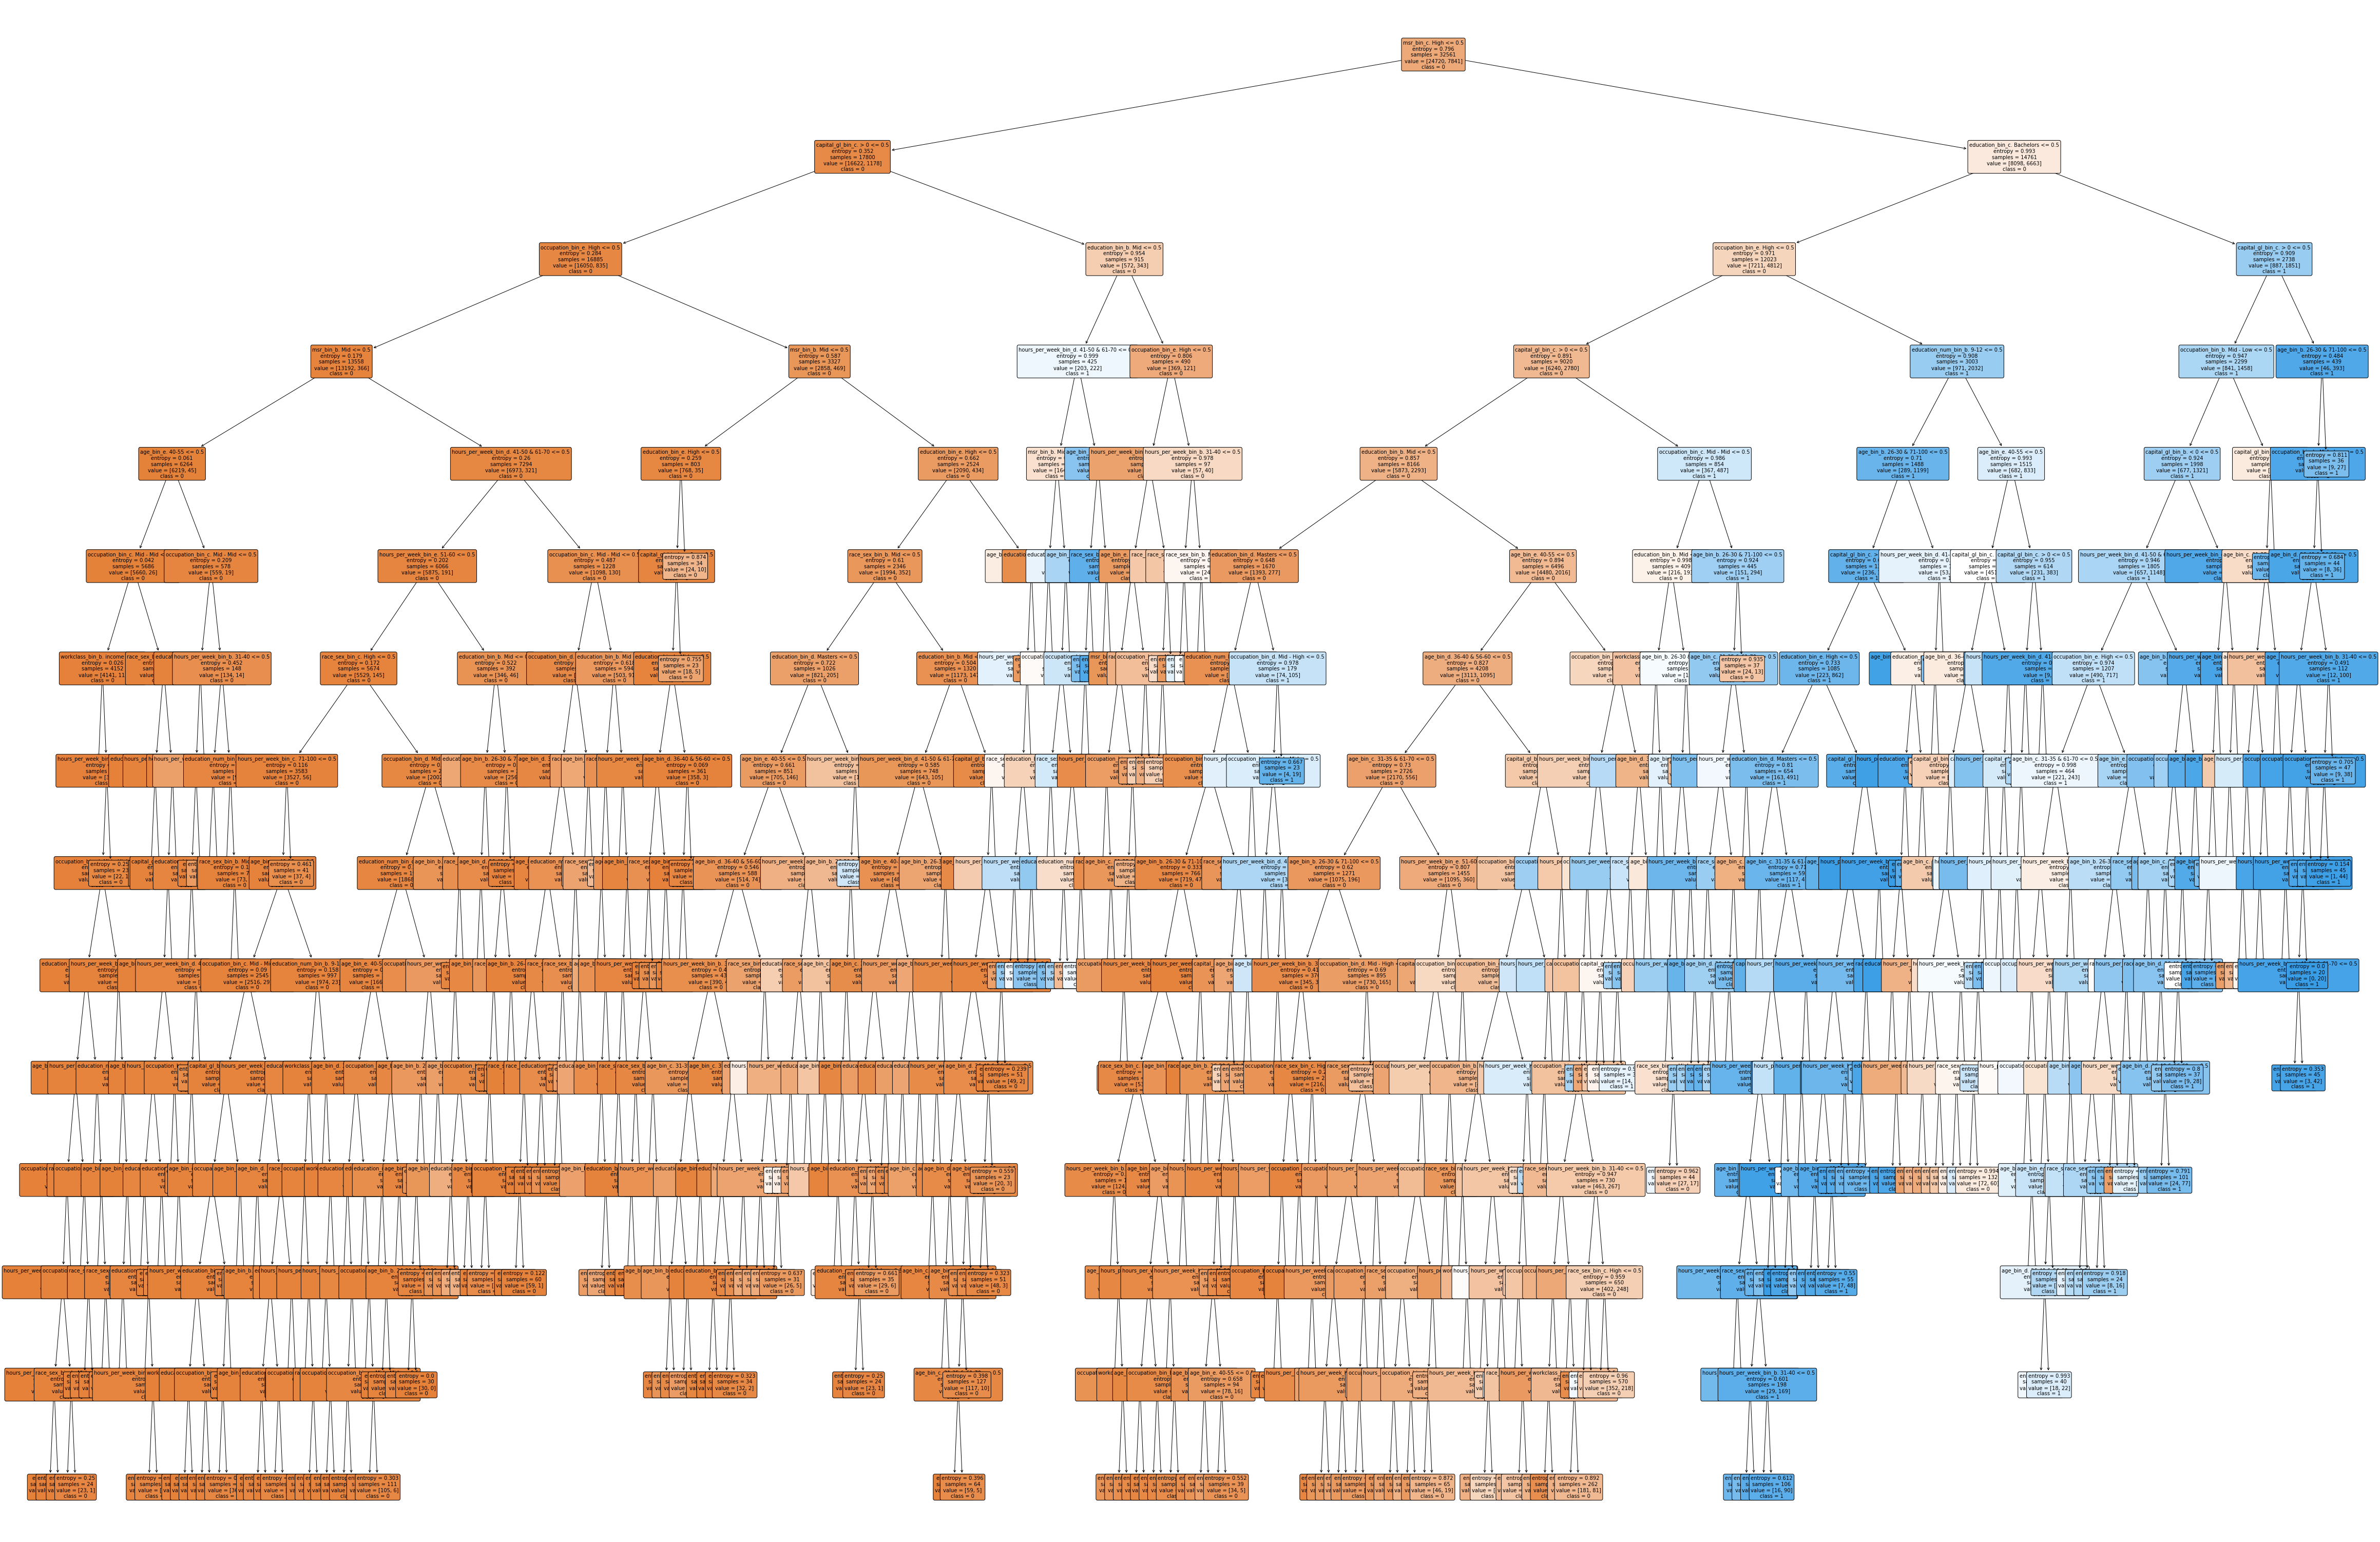

In [ ]:
#visualizing the "best" decision tree developed in the previous part
from sklearn.tree import plot_tree
best_dtree = DecisionTreeClassifier(criterion='entropy', max_features=0.7, min_samples_leaf=20,
                                    max_depth=14, random_state=101)
best_dtree.fit(x_train, y_train)
plt.figure(figsize=(80, 55))
a = plot_tree(best_dtree, feature_names=list(x_train), class_names=["0", "1"],
              filled=True, rounded=True, fontsize=10)
plt.show()

# **7. Conclusion**

***Q.4 How long was your total run time to train the best model?***

Runtime of the best model shown below


In [ ]:
#Calculating the total run time to train our best model, (output shown below)
%%time
best_dtree = DecisionTreeClassifier(criterion='entropy', max_features=0.7, min_samples_leaf=20,
                                    max_depth=14, random_state=101)
best_dtree.fit(x_train, y_train)
y_pred=best_dtree.predict(x_test)

CPU times: user 77.7 ms, sys: 2.76 ms, total: 80.5 ms
Wall time: 93 ms


***Q.5 Did you find the BEST TREE?***

The tree that I did find I believe to be the best because of its accuracy, recall, precision, and F1-score of all of the runs that I did. 


***Q.6 Write your observations from the visualization of the best tree***

The tree that I created ran which I was thankful for but also its a bit hard to interpret because of its size. In this case, it is hard to be able to interpret some of the smaller details most likely because of the "figsize" that I chose for the model.


***Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)***

The potential for overfitting in this decision tree model would be based on the complexity of the tree and the amount and quality of the training data. In this case, the maximum depth of the decision tree model was set to 14, which means the tree can have at most 14 levels or nodes. This limit on the depth can help to prevent the tree from becoming too complex and overfitting the training data.

# **8. Prediction Using "Trained" Decision Tree Model**

In [57]:
#Using the criteria given in the question, we input it into the correct parameters using our best trained model to predict income
pred_df=pd.DataFrame({'age_bin_b. 26-30 & 71-100':0,'age_bin_c. 31-35 & 61-70':0,
                 'age_bin_d. 36-40 & 56-60':1,'age_bin_e. 40-55':0,
                 'capital_gl_bin_b. < 0':0,'capital_gl_bin_c. > 0':1,
                 'education_bin_b. Mid':0,'education_bin_c. Bachelors':0,
                 'education_bin_d. Masters':0,'education_bin_e. High':1,
                 'hours_per_week_bin_b. 31-40':0,
                 'hours_per_week_bin_c. 71-100':0,
                 'hours_per_week_bin_d. 41-50 & 61-70':1,
                 'hours_per_week_bin_e. 51-60':0,'msr_bin_b. Mid':0,
                 'msr_bin_c. High':1,'occupation_bin_b. Mid - Low':1,
                 'occupation_bin_c. Mid - Mid':0,
                 'occupation_bin_d. Mid - High':0,'occupation_bin_e. High':0,
                 'race_sex_bin_b. Mid':1,'race_sex_bin_c. High':0,
                 'education_num_bin_b. 9-12':1,'education_num_bin_c. 13':0,
                 'education_num_bin_d. 14':0,'education_num_bin_e. 15+':0,
                 'workclass_bin_b. income':1},index=[0])

In [58]:
#Taking a look at our predicted model
print(pred_df)

   age_bin_b. 26-30 & 71-100  age_bin_c. 31-35 & 61-70  \
0                          0                         0   

   age_bin_d. 36-40 & 56-60  age_bin_e. 40-55  capital_gl_bin_b. < 0  \
0                         1                 0                      0   

   capital_gl_bin_c. > 0  education_bin_b. Mid  education_bin_c. Bachelors  \
0                      1                     0                           0   

   education_bin_d. Masters  education_bin_e. High  ...  \
0                         0                      1  ...   

   occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
0                            0                             0   

   occupation_bin_e. High  race_sex_bin_b. Mid  race_sex_bin_c. High  \
0                       0                    1                     0   

   education_num_bin_b. 9-12  education_num_bin_c. 13  \
0                          1                        0   

   education_num_bin_d. 14  education_num_bin_e. 15+  workclass_bin_b. in